# **Exploratory Data Analysis and Visualization**

# Identifying and Sourcing Relevent Datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

file_path = "/content/train.csv"
df = pd.read_csv(file_path)
display(df.head())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Cleaning and Handling Missing values

In [ ]:
print("Missing values before cleaning:\n", df.isnull().sum())

# Impute 'Arrival Delay in Minutes' with its mean
mean_arrival_delay = df['Arrival Delay in Minutes'].mean()
df['Arrival Delay in Minutes'].fillna(mean_arrival_delay, inplace=True)

# Confirm missing values are handled
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes

<ipython-input-2-cae0eed89b3e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(mean_arrival_delay, inplace=True)


In [ ]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [ ]:
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for col in categorical_columns:
    df[col] = df[col].str.strip().str.title()  # Capitalize and remove spaces

In [ ]:
duplicates_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [ ]:
print("Final shape after cleaning:", df.shape)
print("Unique values in key categorical columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

Final shape after cleaning: (103904, 23)
Unique values in key categorical columns:
Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'Disloyal Customer']
Type of Travel: ['Personal Travel' 'Business Travel']
Class: ['Eco Plus' 'Business' 'Eco']
satisfaction: ['Neutral Or Dissatisfied' 'Satisfied']


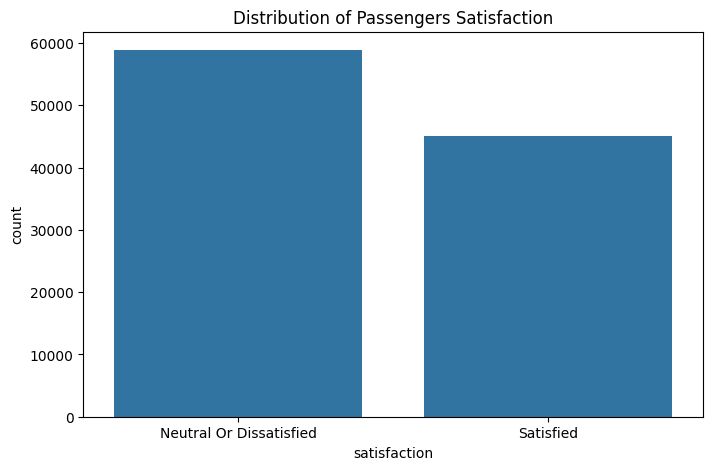

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="satisfaction",data=df)
plt.title("Distribution of Passengers Satisfaction")
plt.show()

#Features Selection & Engineering

In [ ]:
#Creating new features
df["Service_Score"] = df[["Food and drink", "Inflight entertainment", "Cleanliness"]].mean(axis=1)
df["Delay_Flags"] = df["Departure Delay in Minutes"].apply(lambda x: 1 if x > 60 else 0)

In [ ]:
#Categorical Encoding
# For gender and class
df = pd.get_dummies(df, columns=["Class","Gender"])

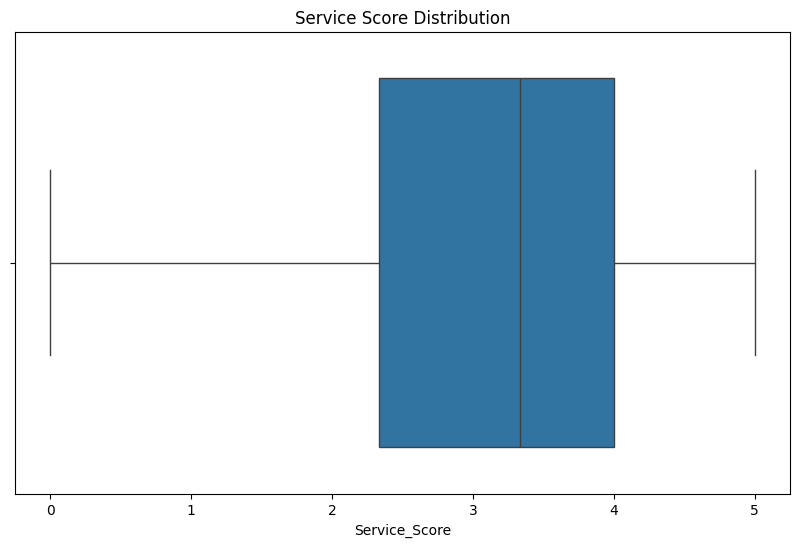

In [ ]:
#Outlier analysis
#Box plot for data distribution
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Service_Score"])
plt.title("Service Score Distribution")
plt.show()

#Insuring Data Integrity and Consistency

In [ ]:
#Z-Score Calculation
df["Service_Score_Z"] = zscore(df["Service_Score"])
outliers = df[df["Service_Score_Z"].abs() > 3]
print("Outliers Based on Service Score: \n", outliers)

Outliers Based on Service Score: 
 Empty DataFrame
Columns: [Customer Type, Age, Type of Travel, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction, Service_Score, Delay_Flags, Class_Business, Class_Eco, Class_Eco Plus, Gender_Female, Gender_Male, Service_Score_Z]
Index: []

[0 rows x 29 columns]


In [ ]:
#Data Transformation
df['Log_Departure_Delay'] = np.log1p(df['Departure Delay in Minutes'])

In [ ]:
#Documentation & Insights
#Summary of Insights
print("\nFeature Summary: \n", df[["Service_Score", "Delay_Flags", "Log_Departure_Delay"]].head())


Feature Summary: 
    Service_Score  Delay_Flags  Log_Departure_Delay
0       5.000000            0             3.258097
1       1.000000            0             0.693147
2       5.000000            0             0.000000
3       2.000000            0             2.484907
4       3.333333            0             0.000000


In [ ]:
print(df['satisfaction'].unique())
print(df[['Service_Score', 'satisfaction']].head())

['Neutral Or Dissatisfied' 'Satisfied']
   Service_Score             satisfaction
0       5.000000  Neutral Or Dissatisfied
1       1.000000  Neutral Or Dissatisfied
2       5.000000                Satisfied
3       2.000000  Neutral Or Dissatisfied
4       3.333333                Satisfied


# Summary Statistics and Insights


In [ ]:
#Insights and Key findings
avg_satisfied = df[df['satisfaction'] == 'satisfied']['Service_Score'].mean()
avg_dissatisfied = df[df['satisfaction'] == 'dissatisfied']['Service_Score'].mean()
print(f"Average Service Score for Satisfied Passengers: {avg_satisfied:.4f}")
print(f"Average Service Score for Dissatisfied Passengers: {avg_dissatisfied:.4f}")

Average Service Score for Satisfied Passengers: nan
Average Service Score for Dissatisfied Passengers: nan


# Identifying Patterns, trends and Anomalies

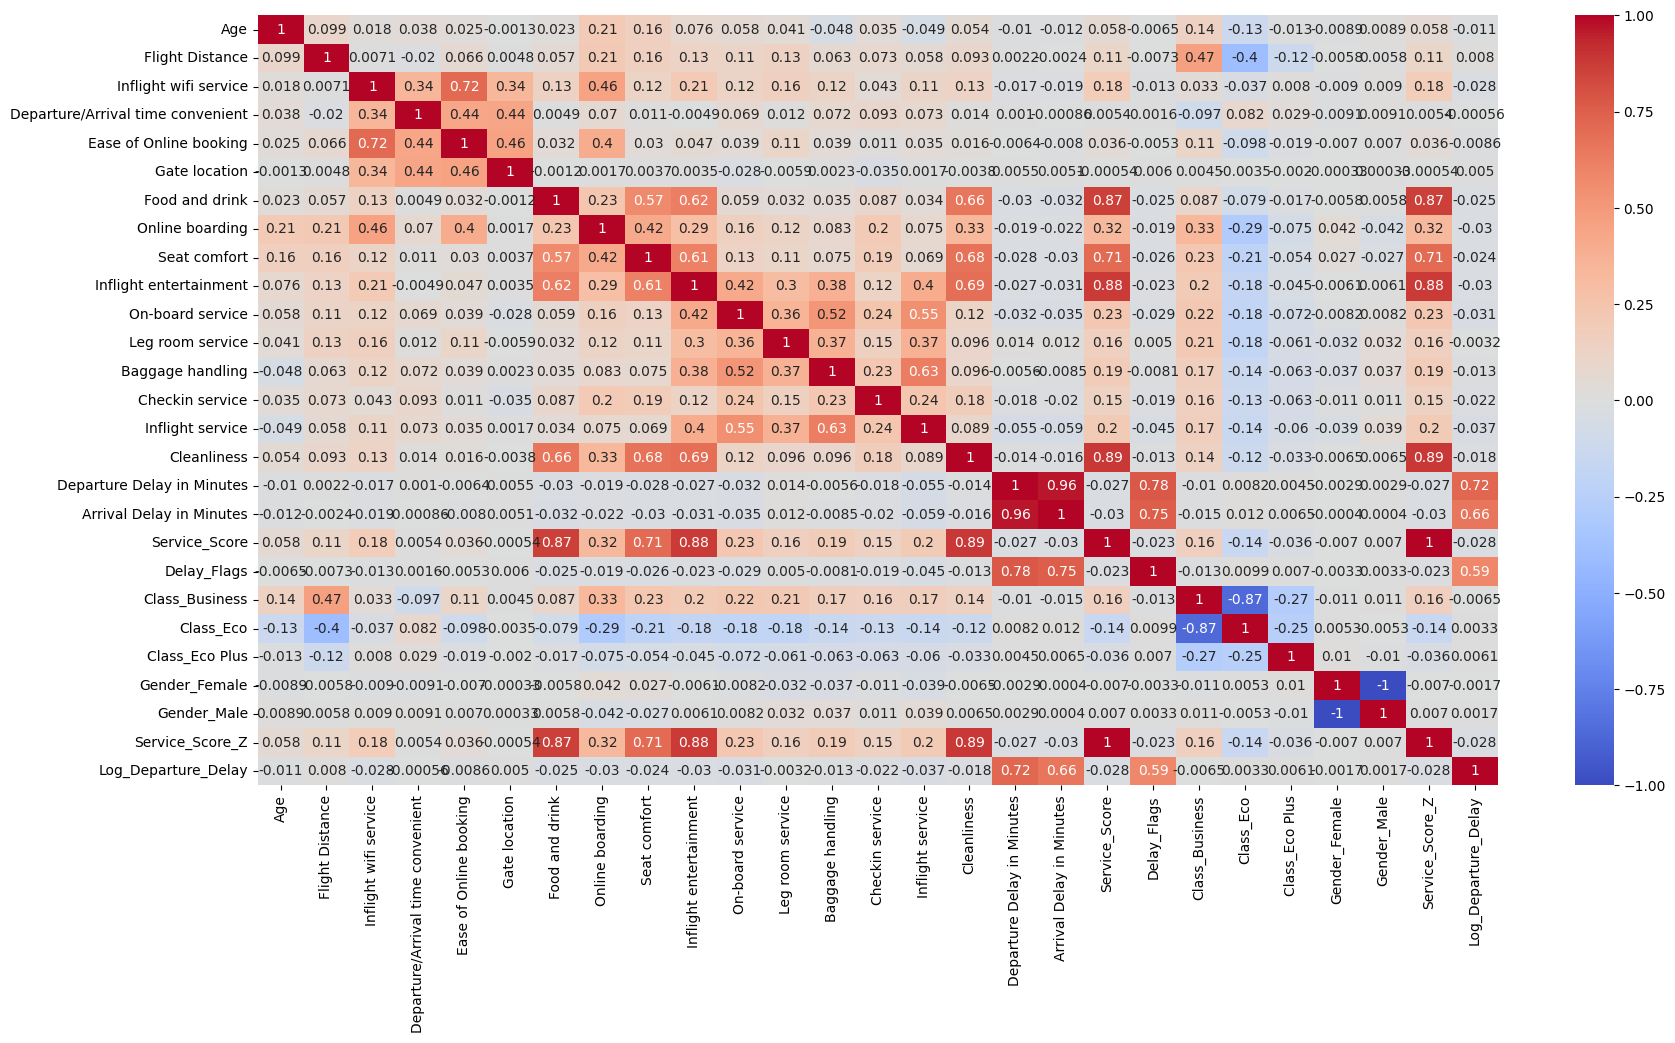

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only= True), annot=True, vmax=1, cmap='coolwarm')
plt.show()

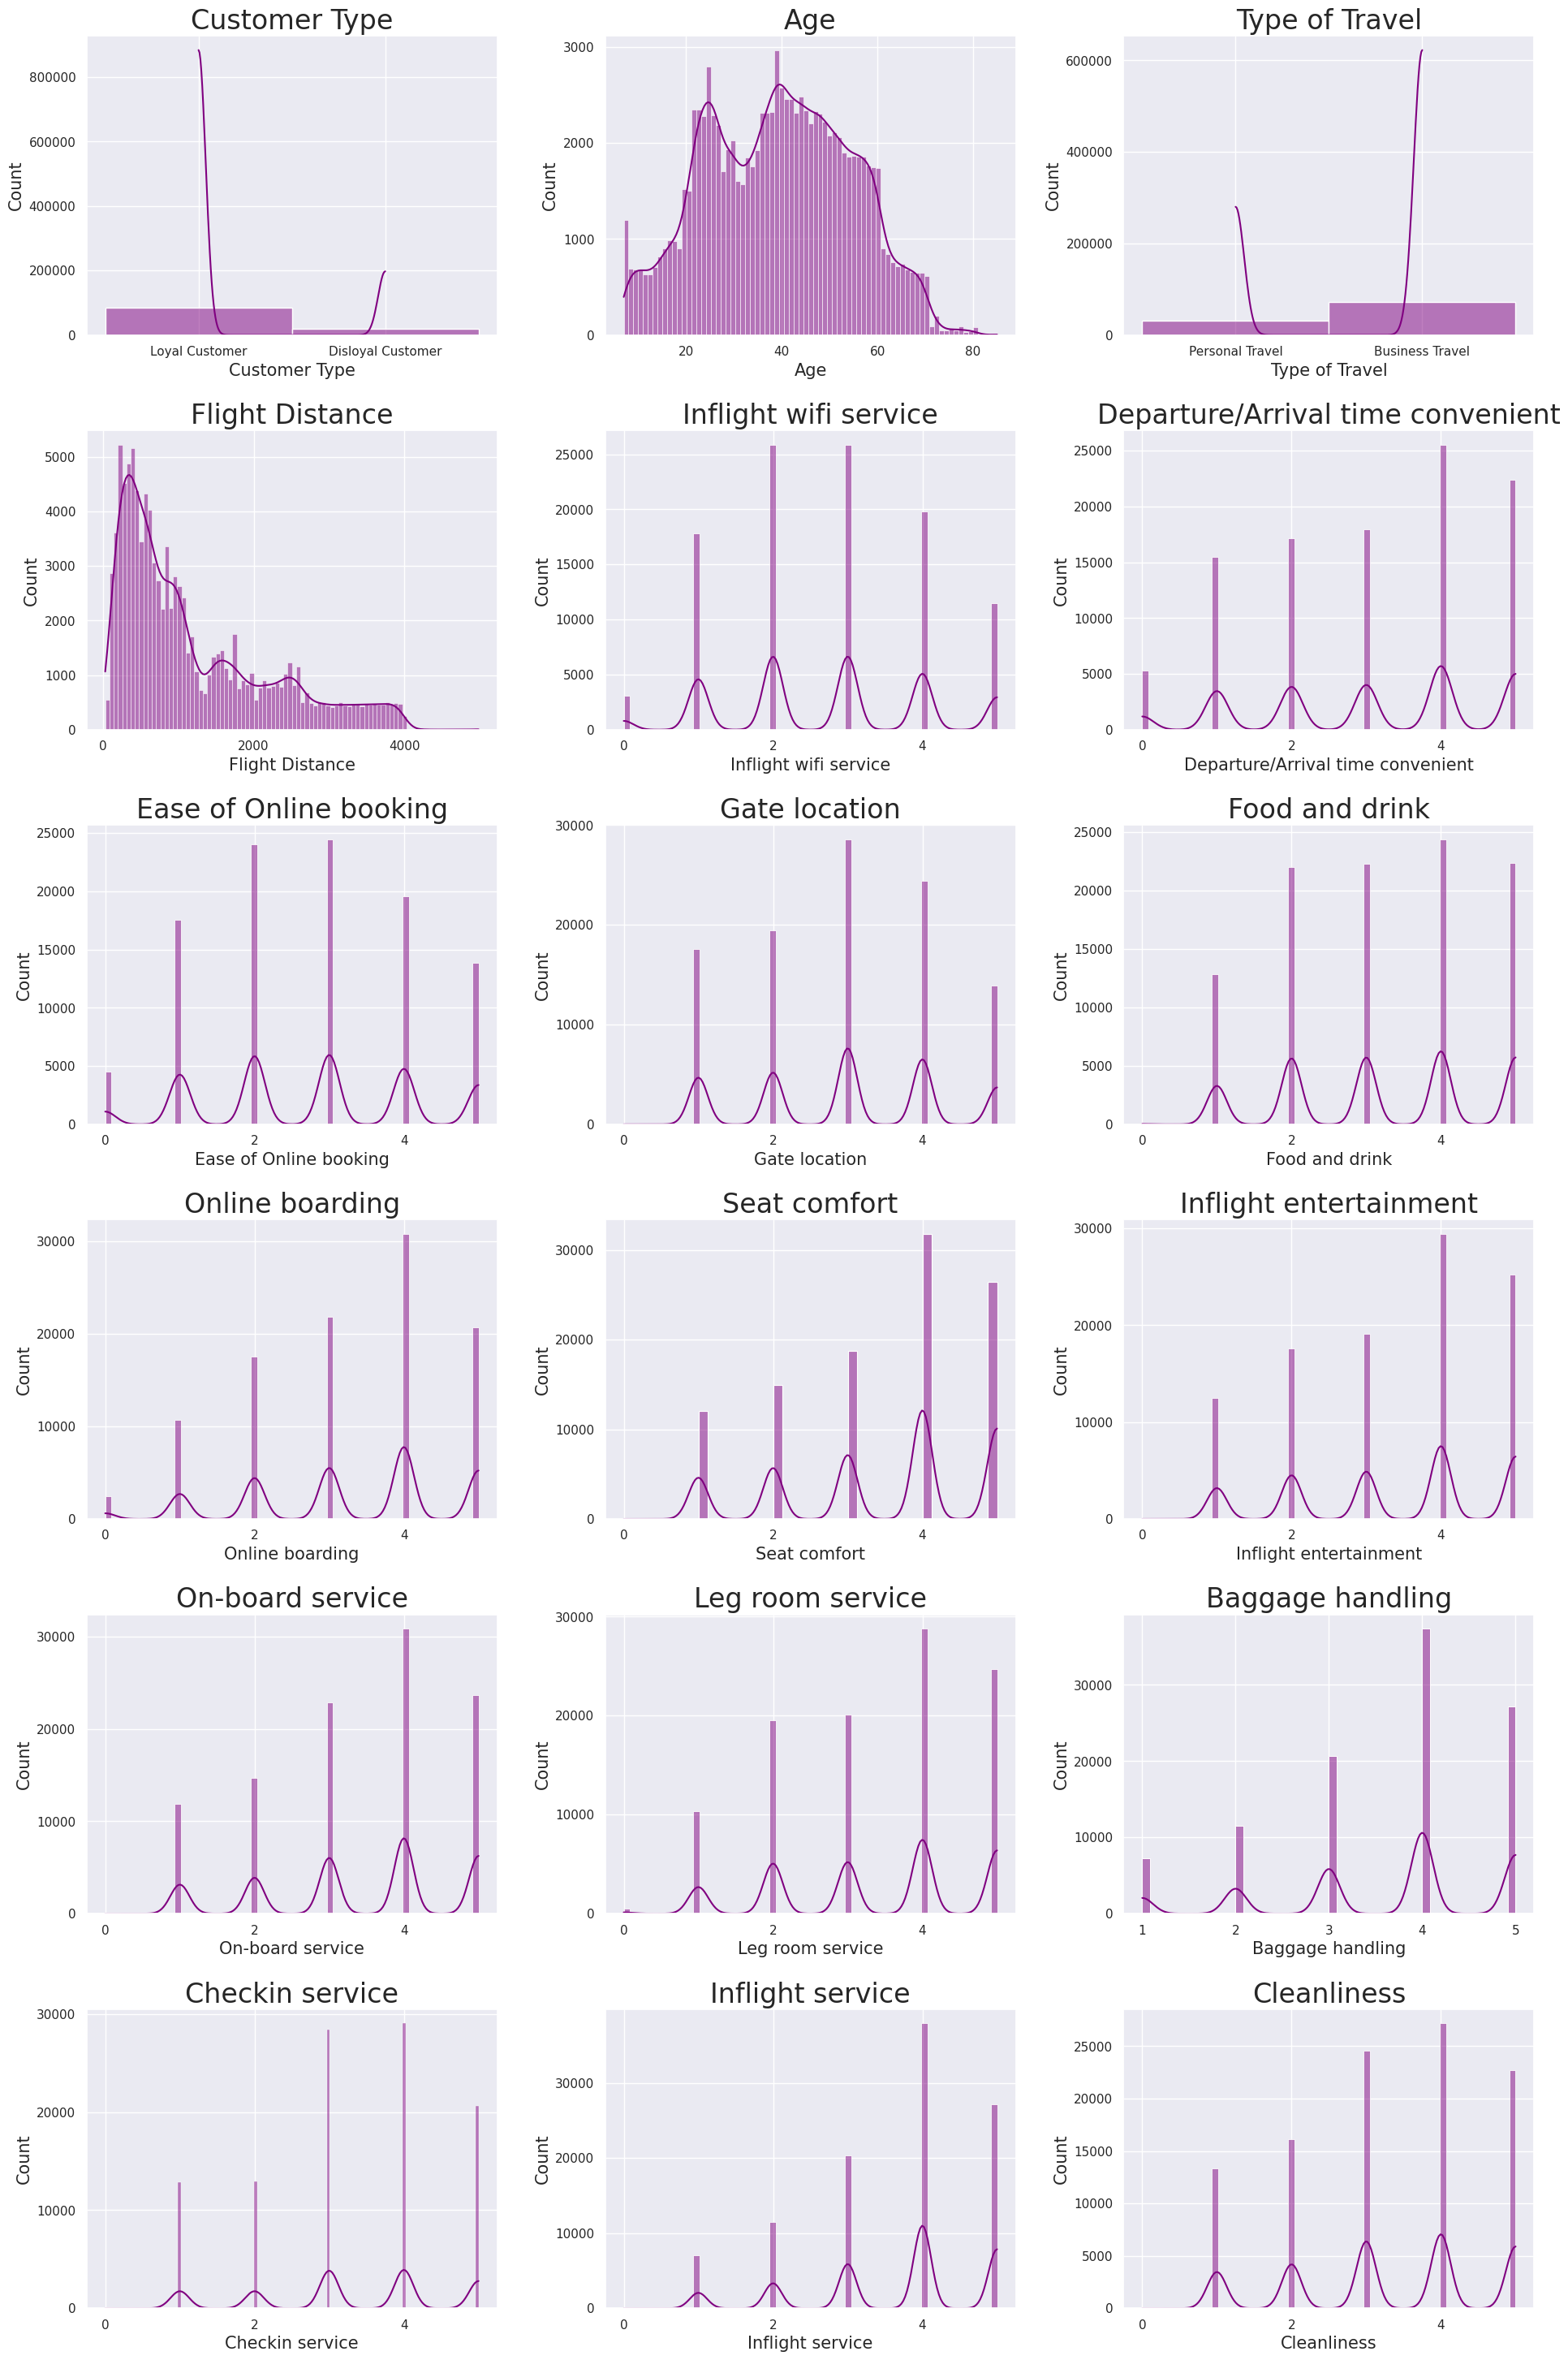

In [ ]:
## Data distribution graphs

sns.set(rc={
    "font.size":15,
    "axes.titlesize":10,
    "axes.labelsize":15},
    style="darkgrid")
fig, axs = plt.subplots(6, 3, figsize=(20,30))
fig.tight_layout(pad=4.0)

for f, ax in zip(df, axs.ravel()):
    sns.set(font_scale = 2)
    ax = sns.histplot(ax=ax, data=df, x=df[f], kde=True, color='purple')
    ax.set_title(f)

In [ ]:
new_train_df = df.copy()

In [ ]:
new_train_df.drop(['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction'], axis=1, inplace=True)

In [ ]:
## Satisfaction
df.satisfaction.value_counts()

,count
satisfaction,
Neutral Or Dissatisfied,58879
Satisfied,45025


# Handling Outliers and Data Transformations

In [ ]:
# numerical and categorical features
numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
categorical_cols = df.select_dtypes('object').columns.to_list()

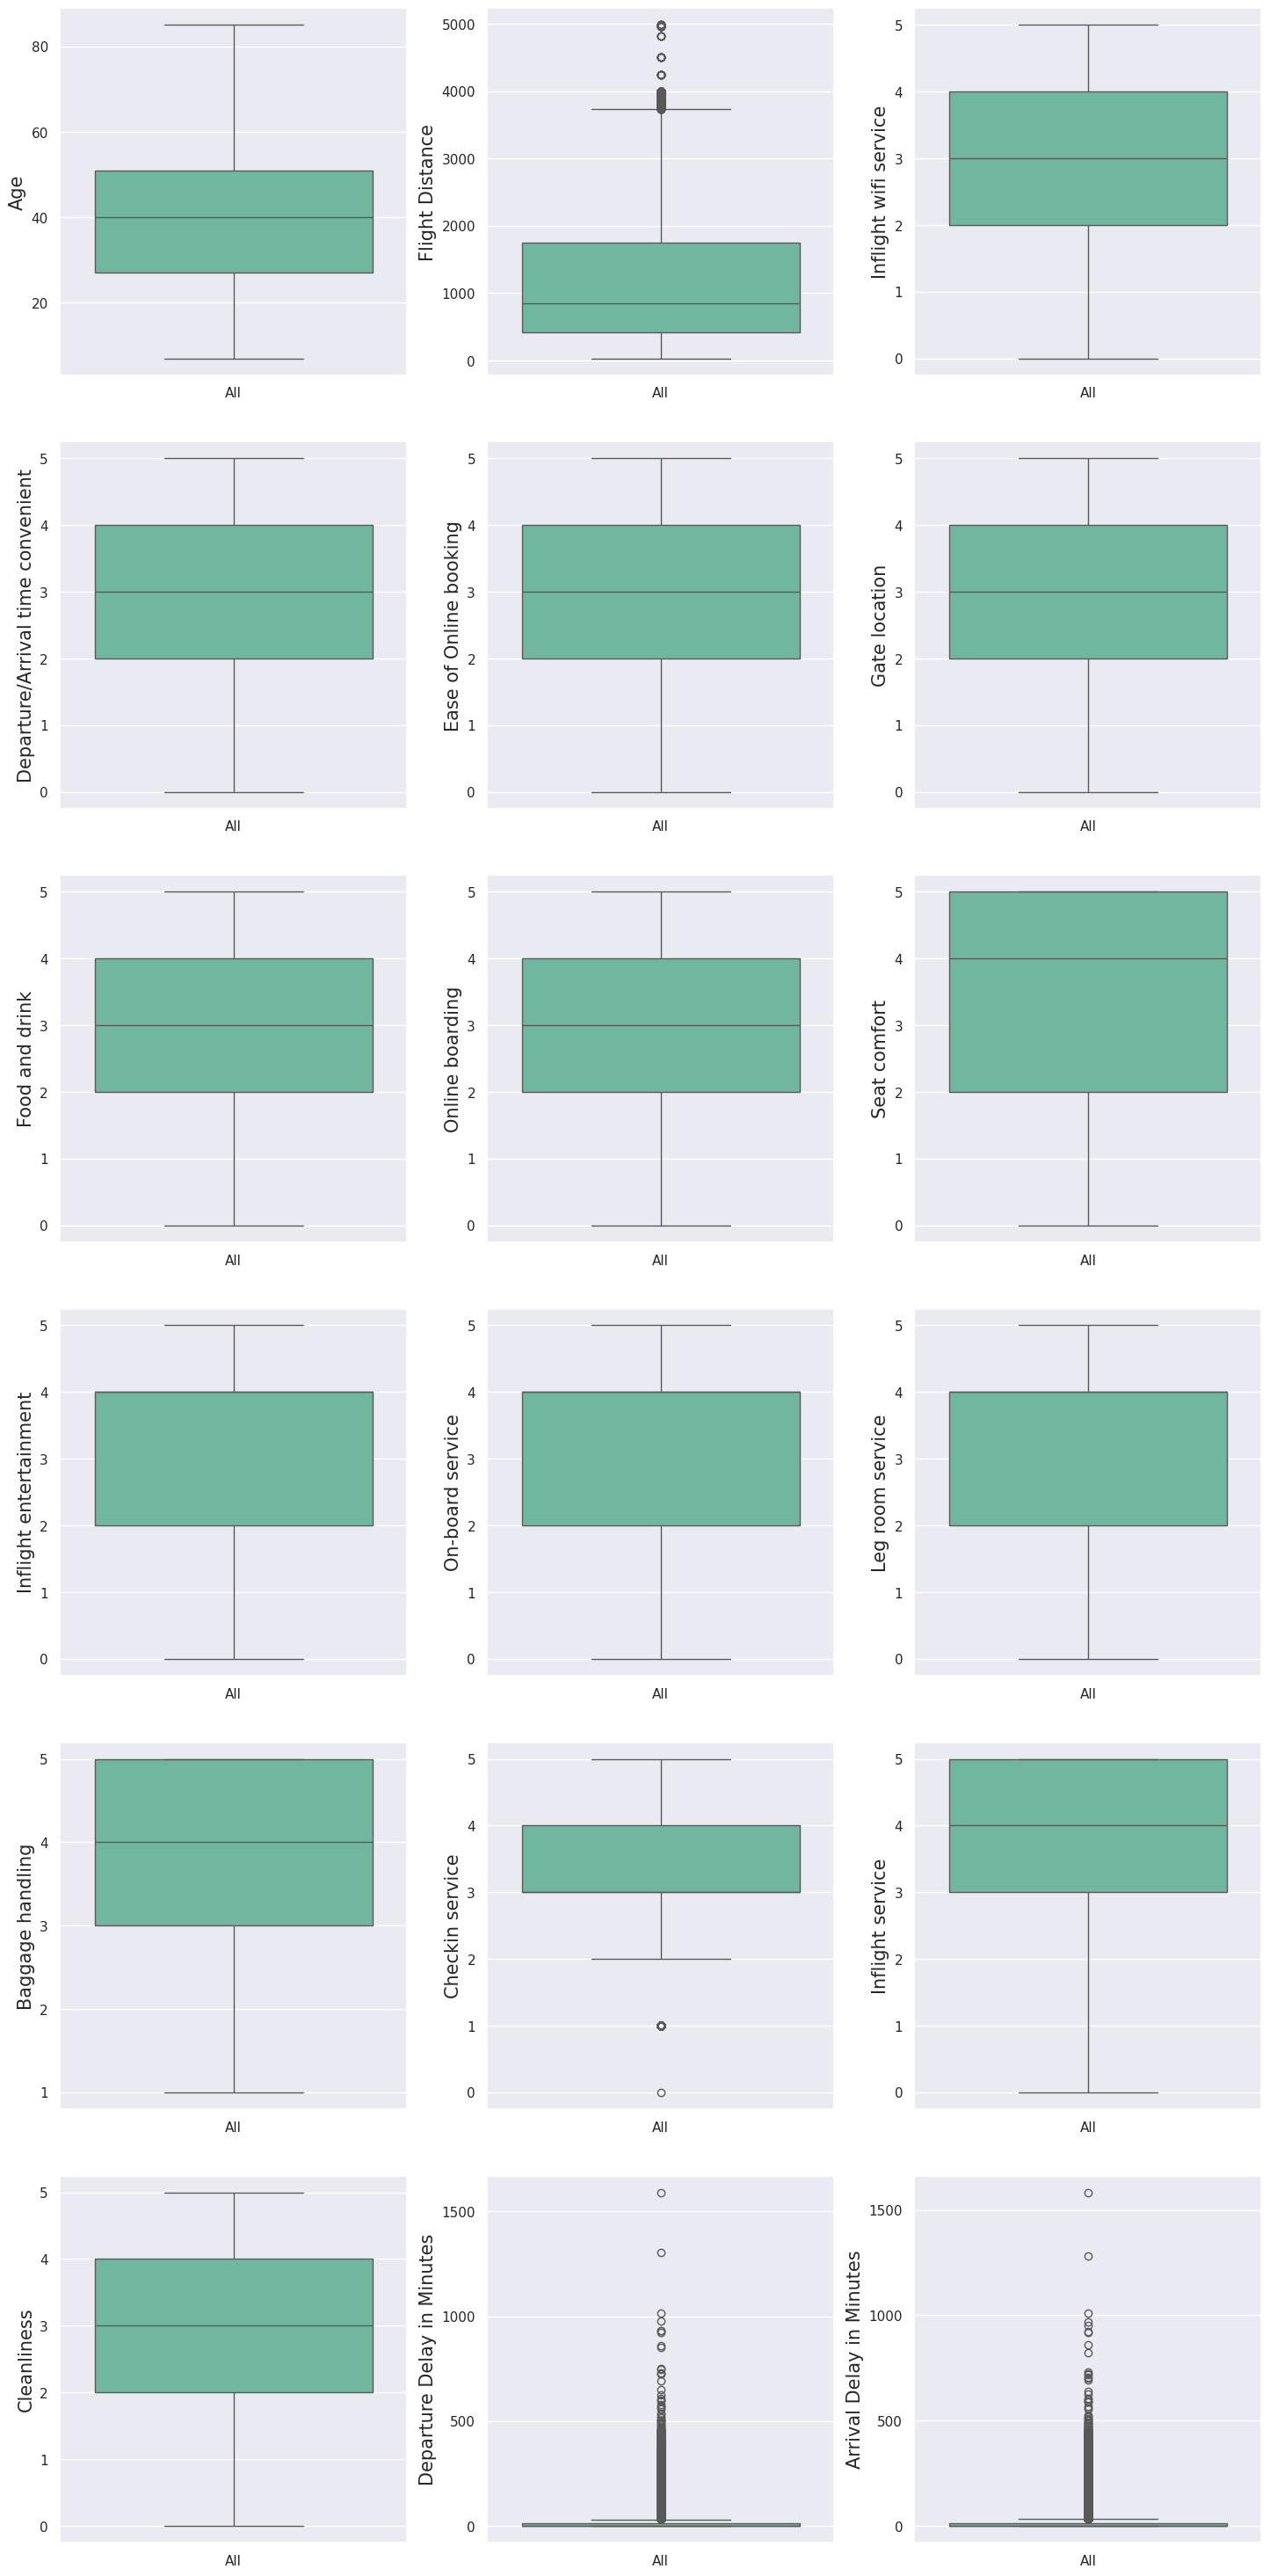

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={
    "font.size": 10,
    "axes.titlesize": 10,
    "axes.labelsize": 15},
    style="darkgrid"
)

fig, axs = plt.subplots(6, 3, figsize=(15, 30))
fig.tight_layout(pad=3.0)

for f, ax in zip(numerical_cols, axs.ravel()):
    sns.set(font_scale=2)
    sns.boxplot(ax=ax,
                data=df.assign(dummy="All"),
                x="dummy", y=f,
                palette='BuGn', hue="dummy", legend=False)
    ax.set_xlabel("")  # optional: hide x-axis label


<ipython-input-21-1d5290b29c2f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "satisfaction", data=df, ax=ax2, palette='RdYlBu')


Text(0.5, 1.0, 'Distribution of Satisfaction')

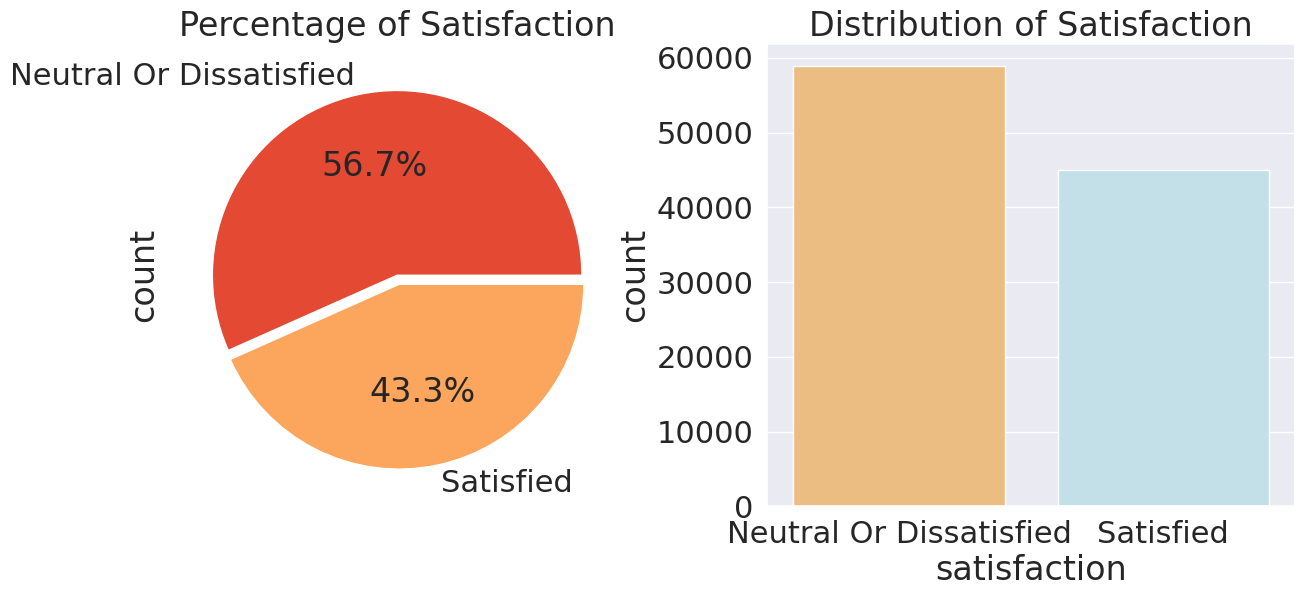

In [ ]:
## Piechart perrcentage distribution features

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
df.satisfaction.value_counts().plot.pie(explode=(0, 0.05), colors=sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title("Percentage of Satisfaction")
sns.countplot(x= "satisfaction", data=df, ax=ax2, palette='RdYlBu')
ax2.set_title("Distribution of Satisfaction")

<ipython-input-23-b78950c88f2c>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=(1.05,0.5))


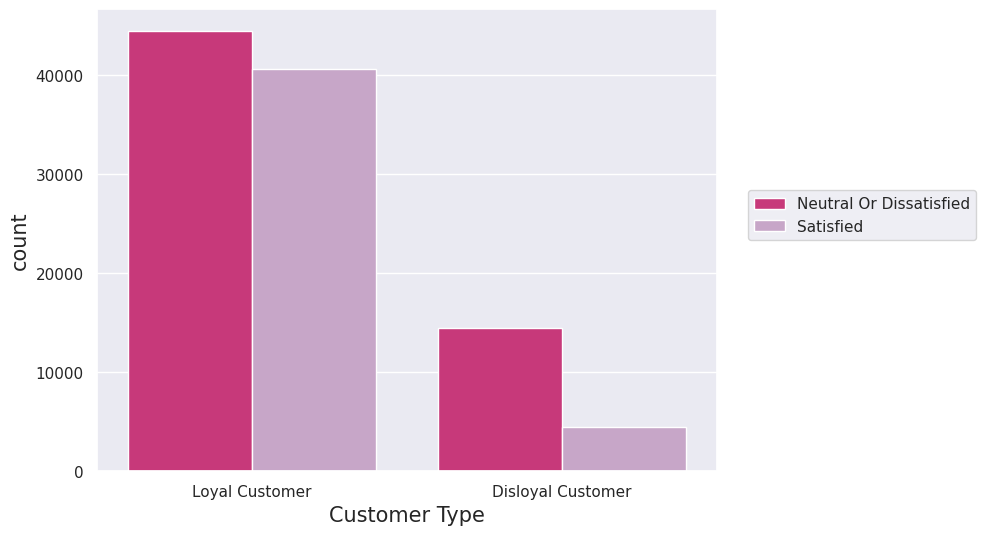

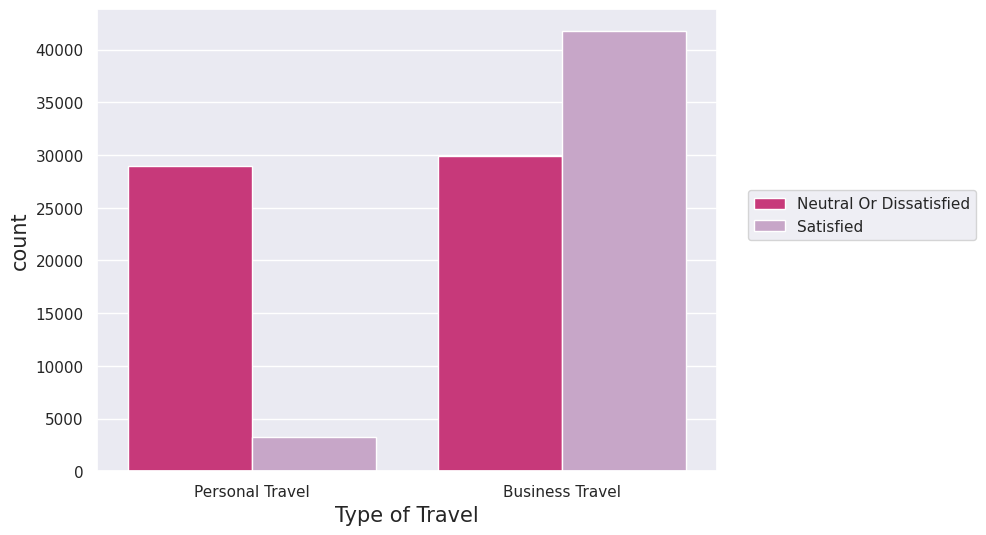

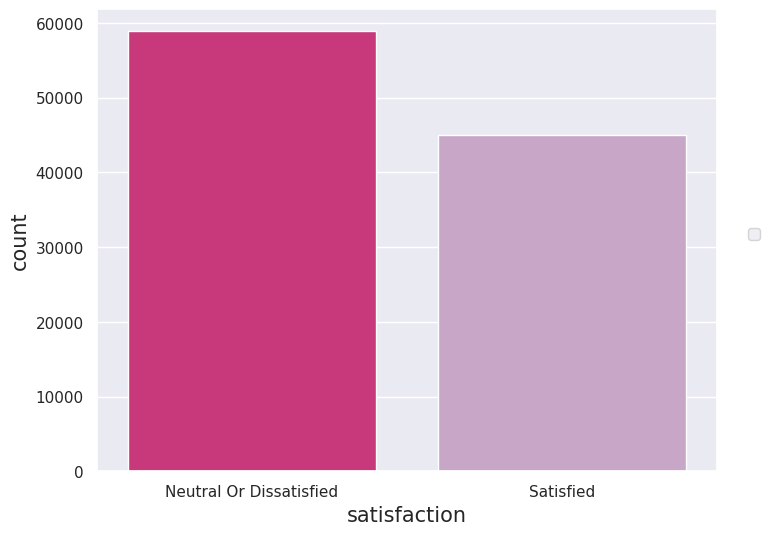

In [ ]:
## Barplot representaion on Categoricol Column

sns.set(rc={'figure.figsize':(11.7,8.27),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df,x=col, hue='satisfaction', palette='PuRd_r')
    plt.legend(loc=(1.05,0.5))

In [ ]:
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

,Arrival Delay in Minutes
satisfaction,
Neutral Or Dissatisfied,17.121512
Satisfied,12.638043


# Initial Visual Representations of Key Findings

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

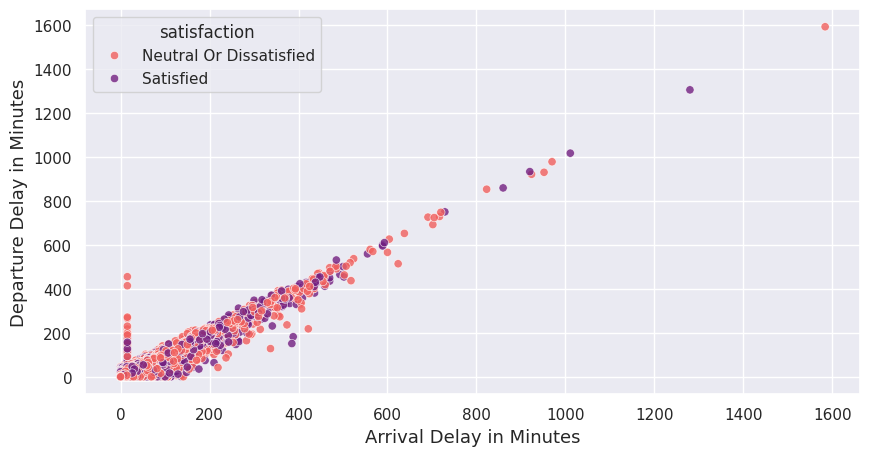

In [ ]:
## Arrival Delay in Minutes VS Departure Delay in minutes

sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(data=df, x="Arrival Delay in Minutes", y= "Departure Delay in Minutes", hue='satisfaction', palette="magma_r",alpha=0.8)


(0.0, 1000.0)

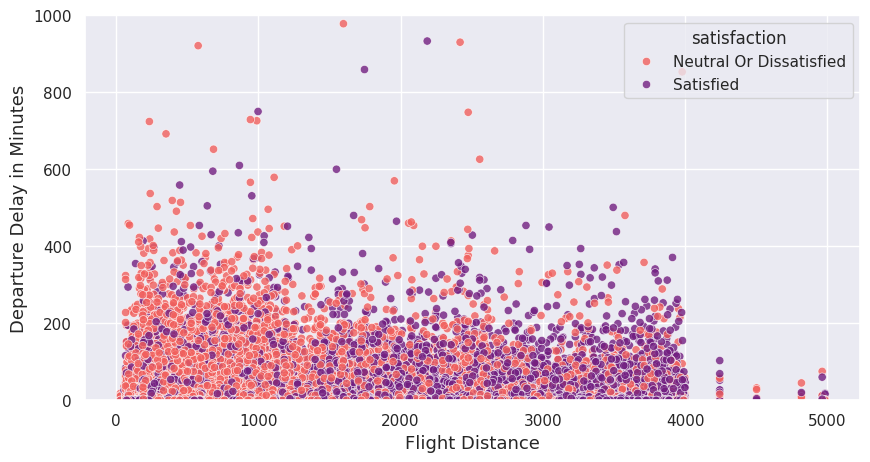

In [ ]:
## Flight distance vs Departure Delay in Minutes

sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(data=df, x="Flight Distance", y= "Departure Delay in Minutes", hue='satisfaction', palette="magma_r",alpha=0.8)
plt.ylim(0,1000)

<ipython-input-27-56f07c07fdbd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Customer Type", y= "Age",palette = "gnuplot2_r", ax=ax[0])


<Axes: xlabel='Age', ylabel='Count'>

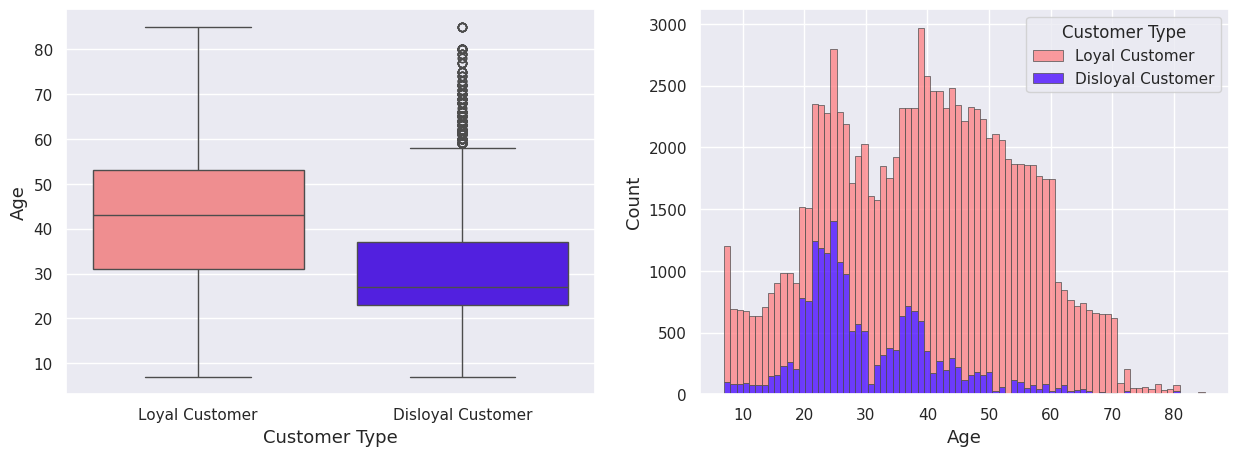

In [ ]:
## Age and Customer type

f, ax = plt.subplots(1,2, figsize=(15, 5))
sns.boxplot(data=df, x="Customer Type", y= "Age",palette = "gnuplot2_r", ax=ax[0])
sns.histplot(data=df, x="Age", hue="Customer Type", multiple="stack", palette = "gnuplot2_r",edgecolor = ".3", linewidth = .5, ax = ax[1])
